## Week8_handin_exercises


# Opgave 1:
#### Brug Python til at lave en database ved navn "cars" med tabellen; "the_cars" og kolonerne; "id", "make", "model", "year", "gas_pr_km". Indsæt data i tabellen ud fra en csv-fil med følgende indhold:
#### 1,Volvo,RX2,2011,17
#### 2,Mazda,Ty4,2015,16
#### 3,Toyota,Aygo,2017,20
#### 4,BMW,KL-1,2012,14

In [9]:
# USING SQLALCHEMY FOR ORM:
import pandas as pd 
from sqlalchemy import create_engine #sqlalchemy helped convert strings to dates seamlessly

# my note: cars DB is created manually. how could we create that automatically?
con_str = "mysql+mysqlconnector://root:root@db/cars"
engine = create_engine(con_str)
#connection = engine.raw_connection()
df = pd.DataFrame({'id' : [1,2,3,4],
                  'make':['Volvo','Mazda','Toyota', 'BMW'],
                  'model':['RX2', 'Ty4', 'Aygo', 'KL-1'],
                  'year':['2011', '2015', '2017', '2012'],
                  'gas_pr_km':['17', '16', '20', '14']})
df = df.applymap(str)
df.to_sql('the_cars',con=engine, if_exists='append', index = False)
df

,id,make,model,year,gas_pr_km
0,1,Volvo,RX2,2011,17
1,2,Mazda,Ty4,2015,16
2,3,Toyota,Aygo,2017,20
3,4,BMW,KL-1,2012,14


## Opgave 2:
### Lav et GET-endpoint "/cars/{id}" som viser en bil med det givne ID.


In [5]:
# Can be seen in python_handin_template/flask/flask_app_week8.py


## Opgave 3:
### Lav et POST-endpoint "cars/add" som tilføjer en ny bil til database ved følgende JSON-format:
{
  "make": "MAKE_HERE",
  "model": "MODEL_HERE",
  "year": XXXX,
  "gas_pr_km": "GAS_HERE"
}

In [ ]:
# Can be seen in python_handin_template/flask/flask_app_week8.py


## Opgave 4:
#### Lav et bar chart der har bil mærke og model på x-aksen (f.eks. "Volvo RX2") og brandstof pr. km på y-aksen (f.eks. 17).
#### Min egen Bonus: Har sorteret, så laveste brændstof / L er først

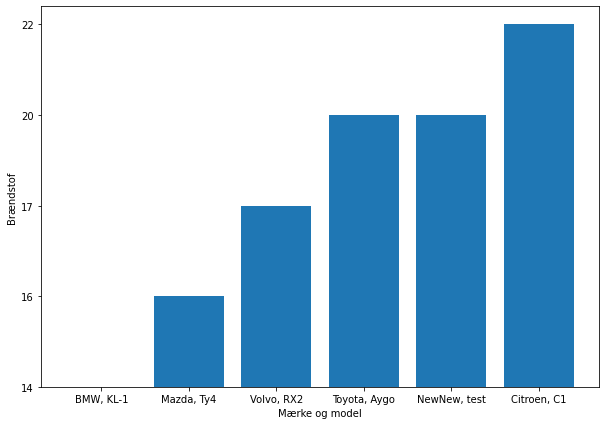

In [77]:
import matplotlib.pyplot as plt
import numpy as np

## Below is needed to read from the SQL table, instead of using the existing, in case we added more from our endpoint..
df = pd.read_sql_table('the_cars', create_engine(con_str))

gas_in_dataframe = df.sort_values(by=['gas_pr_km'], ascending=True)
# Now pick only gas_pr_km. This automatically converts it from a DataFrame to a Series.
gas_in_series = gas_in_dataframe['gas_pr_km']
model_and_make_in_series = gas_in_dataframe['make'] + ", " + gas_in_dataframe['model']

plt.figure(figsize=[10,7])
plt.bar(model_and_make_in_series, gas_in_series)
plt.xlabel('Mærke og model')
plt.ylabel('Brændstof')

plt.show()

# For debug purposes:
# print(type(df['make']))
# print(type(df.sort_values(by=['gas_pr_km'], ascending=False)))